In [75]:
# Some imports we will need for this notebook

import numpy as np
from PIL import Image
import glob
from natsort import natsorted
import os
import random
import requests
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline

%pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [76]:
import Augmentor

In [77]:
data_url = "https://github.com/mdbloice/AugmentorFiles/raw/master/Notebook-Images/Masks-Example/Mask-Sample-Data.zip"
local_file_name = "Mask-Sample-Data.zip"

In [78]:
response = requests.get(data_url, stream = True)
local_zip = open(local_file_name, "wb")
for chunk in response.iter_content(chunk_size = 512):
    if chunk:
        local_zip.write(chunk)

In [79]:
local_zip.close()

In [80]:
# Extract
z = zipfile.ZipFile(local_file_name, "r")
z.extractall()
z.close()


In [81]:
ground_truth_images = natsorted(glob.glob("original/*.jpg"))
segmentation_mask_images = natsorted(glob.glob("segmentation/*.png"))
pigment_network_mask_images = natsorted(glob.glob("pigment-network/*.png"))

In [82]:
for i in range (0, len(ground_truth_images)):
    print("%s: Ground: %s | Mask 1: %s | Mask 2: %s" %
    (i+1, os.path.basename(ground_truth_images[i]),
    os.path.basename(segmentation_mask_images[i]),
    os.path.basename(pigment_network_mask_images[i])))

1: Ground: ISIC_0000000.jpg | Mask 1: ISIC_0000000_Segmentation.png | Mask 2: ISIC_0000000_attribute_pigment_network.png
2: Ground: ISIC_0000001.jpg | Mask 1: ISIC_0000001_Segmentation.png | Mask 2: ISIC_0000001_attribute_pigment_network.png
3: Ground: ISIC_0000006.jpg | Mask 1: ISIC_0000006_Segmentation.png | Mask 2: ISIC_0000006_attribute_pigment_network.png
4: Ground: ISIC_0000007.jpg | Mask 1: ISIC_0000007_Segmentation.png | Mask 2: ISIC_0000007_attribute_pigment_network.png
5: Ground: ISIC_0000008.jpg | Mask 1: ISIC_0000008_Segmentation.png | Mask 2: ISIC_0000008_attribute_pigment_network.png
6: Ground: ISIC_0000009.jpg | Mask 1: ISIC_0000009_Segmentation.png | Mask 2: ISIC_0000009_attribute_pigment_network.png


In [83]:
collated_images_and_masks = list(zip(ground_truth_images, 
                                     segmentation_mask_images, 
                                     pigment_network_mask_images))
collated_images_and_masks

[('original\\ISIC_0000000.jpg',
  'segmentation\\ISIC_0000000_Segmentation.png',
  'pigment-network\\ISIC_0000000_attribute_pigment_network.png'),
 ('original\\ISIC_0000001.jpg',
  'segmentation\\ISIC_0000001_Segmentation.png',
  'pigment-network\\ISIC_0000001_attribute_pigment_network.png'),
 ('original\\ISIC_0000006.jpg',
  'segmentation\\ISIC_0000006_Segmentation.png',
  'pigment-network\\ISIC_0000006_attribute_pigment_network.png'),
 ('original\\ISIC_0000007.jpg',
  'segmentation\\ISIC_0000007_Segmentation.png',
  'pigment-network\\ISIC_0000007_attribute_pigment_network.png'),
 ('original\\ISIC_0000008.jpg',
  'segmentation\\ISIC_0000008_Segmentation.png',
  'pigment-network\\ISIC_0000008_attribute_pigment_network.png'),
 ('original\\ISIC_0000009.jpg',
  'segmentation\\ISIC_0000009_Segmentation.png',
  'pigment-network\\ISIC_0000009_attribute_pigment_network.png')]

In [84]:
images = [[np.array(Image.open(y)) for y in x] for x in collated_images_and_masks]

In [85]:
y = [0, 1, 0, 1, 0, 1]

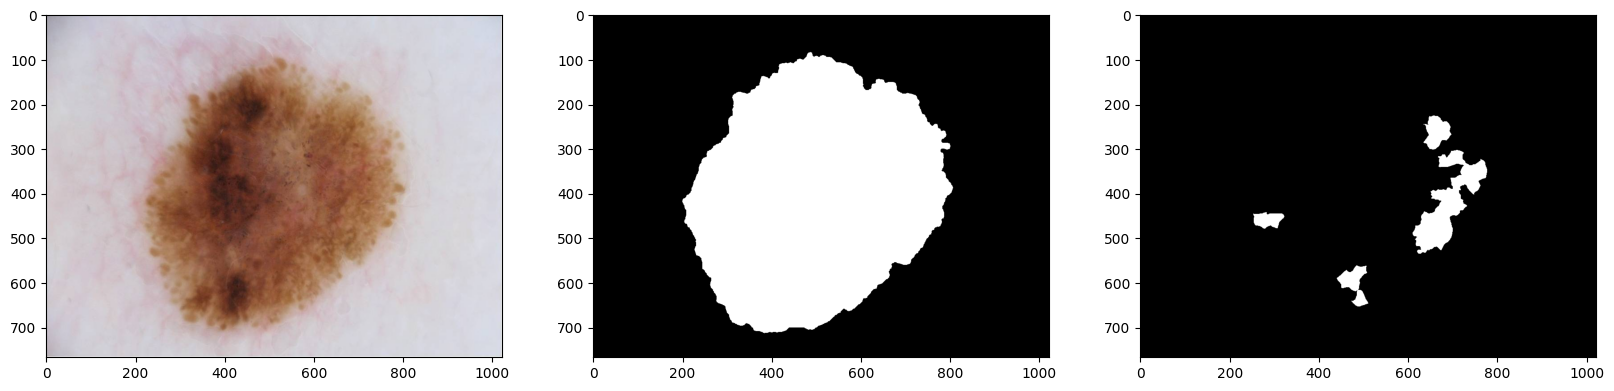

In [86]:
r_index = random.randint(0 ,len(images)-1)
f, axarr = plt.subplots(1, 3, figsize = (20, 15))
axarr[0].imshow(images[r_index][0])
axarr[1].imshow(images[r_index][1], cmap = "gray")
axarr[2].imshow(images[r_index][2], cmap = "gray")

In [87]:
p = Augmentor.DataPipeline(images, y)

In [88]:
p.rotate(1, max_left_rotation = 5, max_right_rotation = 5)
p.flip_top_bottom(0.5)
p.zoom_random(1, percentage_area = 0.5)

In [89]:
augmented_images, labels = p.sample(10)

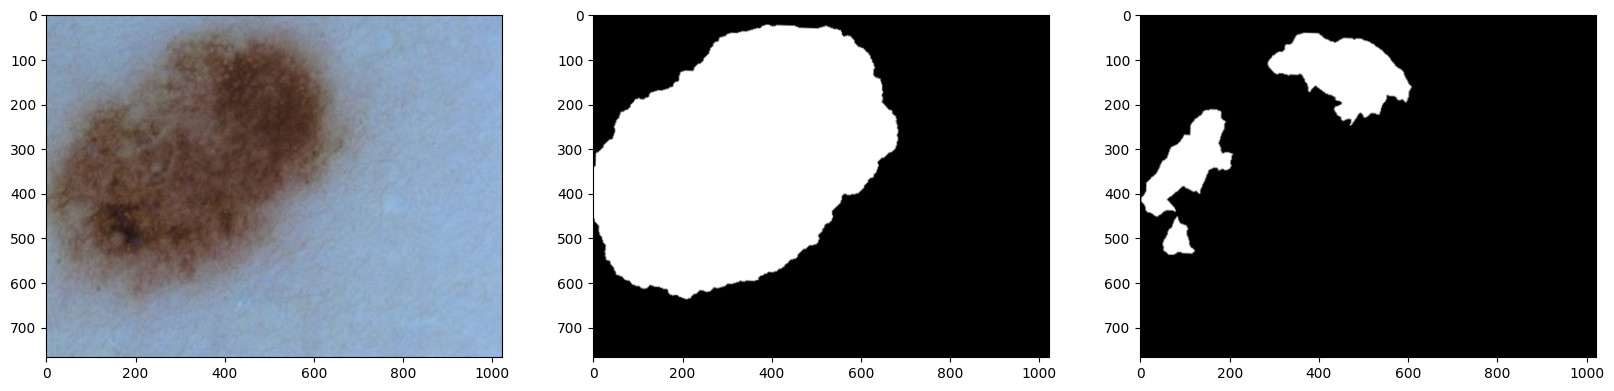

In [90]:
r_index = random.randint(0, len(augmented_images)-1)
f, axarr = plt.subplots(1, 3, figsize=(20,15))
axarr[0].imshow(augmented_images[r_index][0])
axarr[1].imshow(augmented_images[r_index][1], cmap="gray")
axarr[2].imshow(augmented_images[r_index][2], cmap="gray");

In [91]:
g = p.generator(batch_size=10)

In [92]:
augmented_images, labels = next(g)

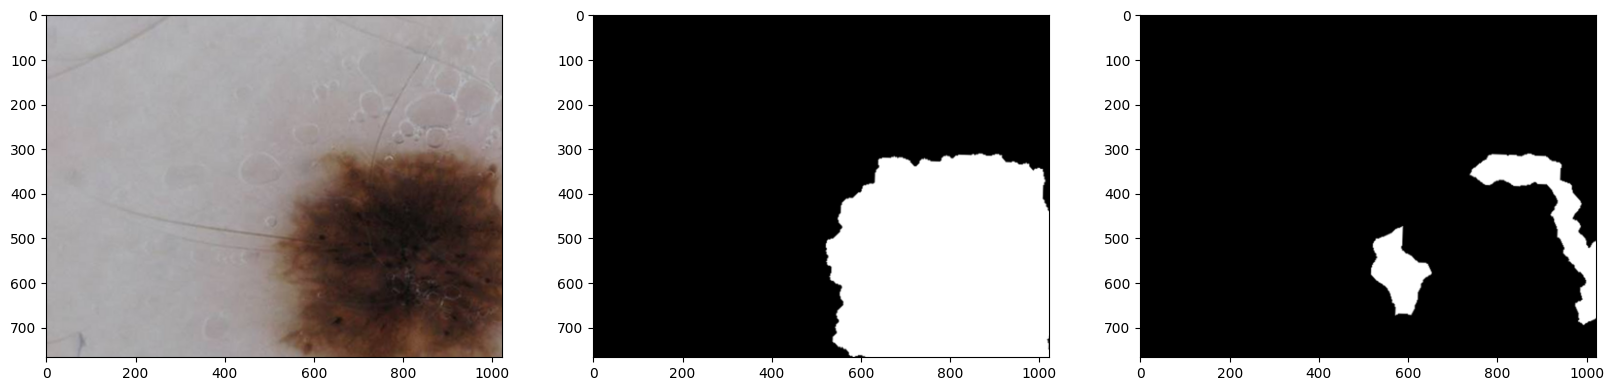

In [93]:
r_index = random.randint(0, len(augmented_images)-1)
f, axarr = plt.subplots(1, 3, figsize=(20,15))
axarr[0].imshow(augmented_images[r_index][0])
axarr[1].imshow(augmented_images[r_index][1], cmap="gray")
axarr[2].imshow(augmented_images[r_index][2], cmap="gray")